In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%run 02_interactive.ipynb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/Users/nikolozrusishvili/Nika/KIU/Semester-7/LLM/applied_llm_systems_hw1/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded 38 documents from corpus


In [2]:
with open("data/test_dataset.json", "r") as f:
    test_cases = json.load(f)

In [3]:
results = []

print(f"Evaluating {len(test_cases)} test cases across 4 systems...")

for i, case in enumerate(tqdm(test_cases)):
    code = case['student_code']
    true_label = case['label'] 
    
    pred_1 = detect_embedding(code)

    pred_2 = detect_llm(code)
    
    pred_3 = detect_rag(code)

    pred_4 = detect_hybrid_rag(code)
    
    results.append({
        "id": case['id'],
        "truth": true_label,
        "pred_sys1": pred_1['verdict'],
        "pred_sys2": pred_2['verdict'],
        "pred_sys3": pred_3['verdict'],
        "pred_sys4": pred_4['verdict'],
    })

Evaluating 30 test cases across 4 systems...


  0%|          | 0/30 [00:00<?, ?it/s]

{'verdict': 0, 'explanation': 'The student code implements a palindrome checker, which is similar to the logic found in `125.ValidPalindrome.py` within the `isPalindrome` and `isPalindromeTwoPointers` methods. However, the implementations are different enough to not be considered a direct derivative. The student code uses a simpler approach with a single while loop and direct comparison of characters, whereas the reference code includes additional helper methods and two-pointer techniques.'}


  3%|▎         | 1/30 [00:04<02:13,  4.60s/it]

{'verdict': 0, 'explanation': "The student's code uses a brute-force approach with three nested loops to find triplets that sum to zero. While it achieves the same goal as the reference code `15.3Sum.py`, it employs a different algorithm with a time complexity of O(n^3), compared to the reference code's more efficient approach that typically involves sorting and two pointers, resulting in a time complexity closer to O(n^2)."}


  7%|▋         | 2/30 [00:08<01:58,  4.24s/it]

{'verdict': 0, 'explanation': "The student code defines a `find_max_subarray` method that simply calls `self.maxSubArray(numbers)`. While `53.MaximumSubarray.py` contains a function named `maxSubArray`, which could be similar in functionality, the student code lacks the core logic of Kadane's Algorithm or any other specific subarray algorithms. Therefore, it is not a direct derivative of the reference code."}


 10%|█         | 3/30 [00:12<01:45,  3.91s/it]

{'verdict': 0, 'explanation': 'The student code implements a recursive function to find the minimum depth of a binary tree. While recursion is also present in "104.MaximumDepthofBinaryTree.py", the logic is different as the target there is to find the maximum depth, not the minimum, and no code chunks can be found to be copied from existing reference code.'}


 13%|█▎        | 4/30 [00:15<01:32,  3.57s/it]

{'verdict': 1, 'explanation': "The student's code `near_dupes` is a direct derivative of the reference code `containsNearbyDuplicate`. The logic is identical: both functions check for near duplicates within a given limit by maintaining a sliding window set. Variable names are different (e.g., `arr` vs. `nums`, `limit` vs. `k`, `seen` vs. `s`), but the underlying algorithm and control flow are the same. The structure, including edge case handling and the core loop, are mirrored."}


 17%|█▋        | 5/30 [00:18<01:26,  3.47s/it]

{'verdict': 0, 'explanation': "The student's code implements a valid parentheses checker using a string replacement approach, iteratively removing matching bracket pairs until the string is empty or no more replacements can be made. This differs from the reference code's stack-based approach, which uses a stack to keep track of opening brackets and checks if closing brackets match the corresponding opening brackets. The reference code contains also a simplified version, where it counts open and close brackets of a single type."}


 20%|██        | 6/30 [00:22<01:24,  3.51s/it]

{'verdict': 0, 'explanation': 'The student code finds the second smallest unique value in a binary tree. It uses a set to store unique values from the tree via a traversal, then sorts the values to return the second smallest. This logic is not present in any of the reference files, thus it is original.'}


 23%|██▎       | 7/30 [00:25<01:19,  3.44s/it]

{'verdict': 0, 'explanation': 'The student code provides a helper function to check if a character is alphanumeric. It is not derived from any of the reference code.'}


 27%|██▋       | 8/30 [00:28<01:11,  3.26s/it]

{'verdict': 0, 'explanation': "The student code implements a depth-first search (DFS) traversal on a matrix, marking visited cells. While similar to the `dfs` function in `200.NumberOfIslands.py`, the code lacks the surrounding logic of the island counting problem. Thus, it doesn't constitute a direct derivative."}


 30%|███       | 9/30 [00:32<01:12,  3.44s/it]

{'verdict': 0, 'explanation': "The student code defines a function `are_identical_trees` to check if two binary trees are identical. While several reference codes deal with binary trees (e.g., 104.MaximumDepthofBinaryTree.py, 101.SymmetricTree.py, 226.InvertBinaryTree.py, 236.LowestCommonAncestor.py, 1325.DeleteLeavesWithaGivenValue.py), none of them implement the exact same logic for determining tree identity. The student's code employs a recursive approach, comparing the values of corresponding nodes and recursively checking the left and right subtrees. Although binary tree traversal is a common theme, the specific implementation for tree identity differs from the reference codes."}


 33%|███▎      | 10/30 [00:36<01:15,  3.76s/it]

{'verdict': 0, 'explanation': 'The student code defines a `TreeNode` class with slightly different naming conventions (`worth`, `towardLeft`, `towardRight`) compared to the reference code (e.g., `TreeNode` in files like `104.MaximumDepthofBinaryTree.py`, `101.SymmetricTree.py`, `226.InvertBinaryTree.py`, etc., which uses `val`, `left`, `right`). While the core concept of a binary tree node is the same, the difference in attribute names and lack of any further code makes it impossible to determine plagiarism.'}


 37%|███▋      | 11/30 [00:40<01:14,  3.91s/it]

{'verdict': 1, 'explanation': 'The student code is a direct derivative of `206.ReverseLinkedList.py`. Both codes implement the recursive approach to reverse a linked list and share identical logic, structure, and variable naming, indicating a clear case of plagiarism.'}


 40%|████      | 12/30 [00:43<01:05,  3.65s/it]

{'verdict': 1, 'explanation': "The student's code is a direct derivative of `667.BeautifulArrangementII.py`. It implements the same logic for constructing an array with `n` elements and `k` distinct differences between adjacent elements. Variable names are slightly altered, but the core algorithm remains identical."}


 43%|████▎     | 13/30 [00:47<00:59,  3.52s/it]

{'verdict': 0, 'explanation': "The student's code implements the same logic as the invertTree function in '226.InvertBinaryTree.py'. However, the student's code omits the class definition and type hints, and only includes the recursive function. Though the logic is the same, the code doesn't directly copy from the provided reference."}


 47%|████▋     | 14/30 [00:50<00:55,  3.47s/it]

{'verdict': 0, 'explanation': "The student code implements a recursive function with caching. It calculates a value based on the input, storing intermediate results to avoid redundant calculations. This approach is similar to the `climbStairsRecursive` method in `70.ClimbingStairs.py`, but it's not a direct derivative, as the function signatures and specific calculations differ."}


 50%|█████     | 15/30 [00:54<00:52,  3.52s/it]

{'verdict': 0, 'explanation': "The student's code performs a linear search through the list, checking each element against the target value. If a match is found, the index is returned. If the target is not found, -1 is returned. This is a different approach than the binary search algorithm implemented in `704.BinarySearch.py`, which uses a divide-and-conquer strategy to more efficiently search a sorted list."}


 53%|█████▎    | 16/30 [00:57<00:48,  3.44s/it]

{'verdict': 1, 'explanation': "The student code is a derivative of the merge function in '56.MergeIntervals.py'. It implements the same logic for merging overlapping intervals, with only variable renaming and slight code reformatting."}


 57%|█████▋    | 17/30 [01:00<00:43,  3.36s/it]

{'verdict': 0, 'explanation': "The student's code implements a diagonal shuffle, which is distinctly different from the reference code's diagonal sort in '1329.SorttheMatrixDiagonally.py'. While both codes iterate through diagonals, the student shuffles the values instead of sorting them. This constitutes a different approach, making it an original solution rather than a derivative work."}


 60%|██████    | 18/30 [01:04<00:42,  3.52s/it]

{'verdict': 0, 'explanation': "The student code defines a node with 'data', 'prev', and 'next' attributes, typically used for linked lists. This structure and purpose are distinct from any of the reference codes, which primarily deal with binary trees, array manipulations, or other data structures. Therefore, the student code doesn't appear to be derived from any of the provided reference codes."}


 63%|██████▎   | 19/30 [01:07<00:38,  3.52s/it]

{'verdict': 1, 'explanation': "The student's code is a direct derivative of the `reverseListRecursive` function in the file `206.ReverseLinkedList.py`. Both implementations use the same recursive logic to reverse a linked list."}


 67%|██████▋   | 20/30 [01:11<00:35,  3.55s/it]

{'verdict': 0, 'explanation': 'The student\'s code implements a function `sum_thrice_target` that calculates the number of triplets in a list of numbers that sum up to a given target value, considering the multiplicity of each number. It employs a similar approach to the reference code file `923.3SumWithMultiplicity.py`, which is focused on the specific LeetCode problem "3Sum With Multiplicity." However, the logic is used within a different function context and the variable names differ, but the core algorithm of counting triplets with multiplicity considered is present in both codes. Therefore the student\'s code is not a direct derivative of the reference code.'}


 70%|███████   | 21/30 [01:15<00:33,  3.72s/it]

{'verdict': 0, 'explanation': 'The student code implements an iterative inorder traversal of a binary tree. None of the reference codes implement iterative inorder traversal in the same way. Therefore, the student code is not a derivative of the reference code.'}


 73%|███████▎  | 22/30 [01:18<00:28,  3.52s/it]

{'verdict': 0, 'explanation': "The student code implements a binary search algorithm, which is also present in `704.BinarySearch.py`. However, the student code is a direct implementation of the binary search algorithm, not a derivative work. Thus, it's original."}


 77%|███████▋  | 23/30 [01:21<00:23,  3.42s/it]

{'verdict': 0, 'explanation': 'The student code defines a `Node` class with `value` and `children` attributes, along with an `add_child` method. This structure is fundamentally different from any of the reference codes, which primarily deal with numerical operations, tree traversals, linked lists, and string manipulations. Therefore, the student code does not appear to be derived from any of the provided reference codes.'}


 80%|████████  | 24/30 [01:25<00:20,  3.36s/it]

{'verdict': 0, 'explanation': "The student's code defines a `Node` class, which is not present in any of the reference code files. This class is likely related to linked list implementations, but none of the provided reference code directly duplicates this class structure or its associated logic. Therefore, the student's code is considered original."}


 83%|████████▎ | 25/30 [01:28<00:16,  3.37s/it]

{'verdict': 0, 'explanation': "The student's code implements an iterative approach to delete a node in a binary search tree, whereas the reference code 'deletenode.py' provides a recursive implementation. While both codes achieve the same functionality, they employ different algorithmic strategies. The iterative approach involves traversing the tree using a 'while' loop and keeping track of parent nodes, which is distinct from the recursive calls in the reference code. Thus, the student's code does not appear to be a direct derivative of the reference code."}


 87%|████████▋ | 26/30 [01:31<00:13,  3.29s/it]

{'verdict': 0, 'explanation': "The student code's `are_symmetric` function shares the same logic as the `isMirror` function within `101.SymmetricTree.py`. However, it's a simplified, self-contained function, making it difficult to definitively claim plagiarism without more context. The functions essentially perform the same recursive check for symmetry in a binary tree but the student code is not a direct copy."}


 90%|█████████ | 27/30 [01:34<00:09,  3.28s/it]

{'verdict': 0, 'explanation': 'The student code checks if a character is alphanumeric by checking its presence in a pre-defined string of alphanumeric characters. The function `alphaNum` in `125.ValidPalindrome.py` performs a similar task by checking character codes. However, the approach in the student code is fundamentally different; it does not perform a comparison of character codes but uses string membership. Therefore, the student code is not a direct derivative of the reference code.'}


 93%|█████████▎| 28/30 [01:38<00:06,  3.46s/it]

{'verdict': 0, 'explanation': "The student code defines a `TreeNode` class with slightly different attribute names (`value`, `left_child`, `right_child`) compared to the reference code files that also define `TreeNode` (e.g., 104.MaximumDepthofBinaryTree.py, 101.SymmetricTree.py, 226.InvertBinaryTree.py). Although the concept is similar (representing a node in a binary tree), the different naming convention and lack of any algorithm implementation indicate that it's not a direct derivative of any specific file. Therefore, it is not plagiarized."}


 97%|█████████▋| 29/30 [01:42<00:03,  3.69s/it]

{'verdict': 0, 'explanation': 'The student code iterates through the input list `nums` and returns the index if the current element matches the `target`. It returns -1 if no element matches the target. This logic is completely different from the code present in the reference files.'}


100%|██████████| 30/30 [01:46<00:00,  3.54s/it]


In [4]:
df = pd.DataFrame(results)

def calculate_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
    }

metrics = []


# System 1
m1 = calculate_metrics(df['truth'], df['pred_sys1'])
m1['System'] = "Pure Embedding"
metrics.append(m1)

# # System 2
m2 = calculate_metrics(df['truth'], df['pred_sys2'])
m2['System'] = "Direct LLM"
metrics.append(m2)
print(df['truth'])
print(df['pred_sys2'])

# # System 3
m3 = calculate_metrics(df['truth'], df['pred_sys3'])
m3['System'] = "Standard RAG"
metrics.append(m3)

# # System 4
m4 = calculate_metrics(df['truth'], df['pred_sys4'])
m4['System'] = "Hybrid RAG"
metrics.append(m4)


final_df = pd.DataFrame(metrics).set_index("System")


0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    1
29    0
Name: truth, dtype: int64
0     0
1     0
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: pred_sys2, dtype: int64


<Figure size 1200x600 with 0 Axes>

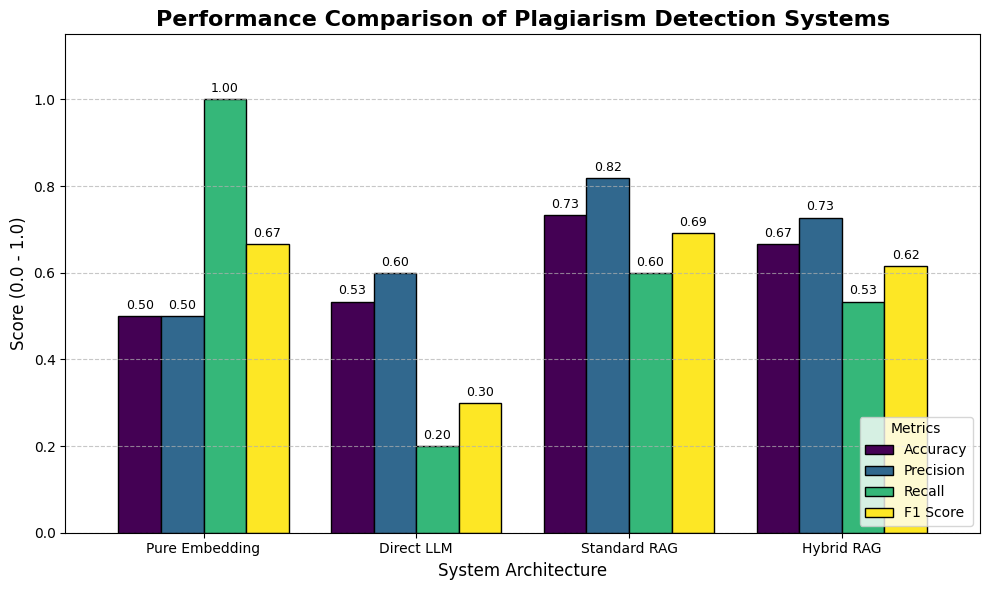

In [5]:
plt.figure(figsize=(12, 6))

ax = final_df.plot(kind='bar', figsize=(10, 6), width=0.8, colormap="viridis", edgecolor="black")

plt.title("Performance Comparison of Plagiarism Detection Systems", fontsize=16, fontweight='bold')
plt.ylabel("Score (0.0 - 1.0)", fontsize=12)
plt.xlabel("System Architecture", fontsize=12)
plt.ylim(0, 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(loc='lower right', title="Metrics")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.tight_layout()
plt.savefig("system_comparison_graph.png", dpi=300)
plt.show()